In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_parquet('source/historic parcel analysis/0228_munci_comm_yearly_06_22.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   munci_comm             3689 non-null   object 
 1   tax_year               3689 non-null   int32  
 2   is_homeowner           3689 non-null   int64  
 3   is_exe_homeowner       3689 non-null   int64  
 4   is_same_address        3689 non-null   int64  
 5   is_org                 3689 non-null   int64  
 6   count                  3689 non-null   uint32 
 7   is_homeowner_mean      3689 non-null   float64
 8   is_exe_homeowner_mean  3689 non-null   float64
 9   is_same_address_mean   3689 non-null   float64
 10  is_org_mean            3689 non-null   float64
dtypes: float64(4), int32(1), int64(4), object(1), uint32(1)
memory usage: 288.3+ KB


In [12]:
df.head()

,munci_comm,tax_year,is_homeowner,is_exe_homeowner,is_same_address,is_org,count,is_homeowner_mean,is_exe_homeowner_mean,is_same_address_mean,is_org_mean
0,ALBANY PARK,2006,4415,4988,6013,817,8748,0.504687,0.570187,0.687357,0.093393
1,ALBANY PARK,2007,3969,4577,6205,961,9096,0.436346,0.503188,0.682168,0.105651
2,ALBANY PARK,2008,4000,4667,6311,1100,9365,0.427122,0.498345,0.673892,0.117459
3,ALBANY PARK,2009,3998,4658,6356,1088,9442,0.423427,0.493328,0.673162,0.115230
4,ALBANY PARK,2010,4018,4715,6337,1062,9453,0.425050,0.498783,0.670369,0.112345


In [6]:
# add percentages

# TODO - check if this interpretation is right

df['pct_is_org'] = df['is_org']/df['count']
df['pct_is_not_homeowner'] = 1 - (df['is_homeowner']/df['count'])

df.head(20)

,munci_comm,tax_year,is_homeowner,is_exe_homeowner,is_same_address,is_org,count,is_homeowner_mean,is_exe_homeowner_mean,is_same_address_mean,is_org_mean,pct_is_org,pct_is_not_homeowner
0,ALBANY PARK,2006,4415,4988,6013,817,8748,0.504687,0.570187,0.687357,0.093393,0.093393,0.495313
1,ALBANY PARK,2007,3969,4577,6205,961,9096,0.436346,0.503188,0.682168,0.105651,0.105651,0.563654
2,ALBANY PARK,2008,4000,4667,6311,1100,9365,0.427122,0.498345,0.673892,0.117459,0.117459,0.572878
3,ALBANY PARK,2009,3998,4658,6356,1088,9442,0.423427,0.493328,0.673162,0.115230,0.115230,0.576573
4,ALBANY PARK,2010,4018,4715,6337,1062,9453,0.425050,0.498783,0.670369,0.112345,0.112345,0.574950
5,ALBANY PARK,2011,4254,5031,6385,1037,9541,0.445865,0.527303,0.669217,0.108689,0.108689,0.554135
6,ALBANY PARK,2012,4514,5387,6192,1125,9537,0.473314,0.564853,0.649261,0.117962,0.117962,0.526686
7,ALBANY PARK,2013,4869,5760,6184,1077,9512,0.511880,0.605551,0.650126,0.113225,0.113225,0.488120
8,ALBANY PARK,2014,4725,5548,6173,1059,9512,0.496741,0.583263,0.648970,0.111333,0.111333,0.503259
9,ALBANY PARK,2015,4644,5403,6218,1039,9493,0.489203,0.569156,0.655009,0.109449,0.109449,0.510797


In [14]:
# turn df from 'long' to 'wide'
df_wide = pd.pivot_table(df,
              index='tax_year',
              columns='munci_comm',
              values='pct_is_org')

df_wide

munci_comm,ALBANY PARK,ARCHER HEIGHTS,ARMOUR SQUARE,ASHBURN,AUBURN GRESHAM,AUSTIN,AVALON PARK,AVONDALE,BELMONT CRAGIN,BEVERLY,...,WEST ELSDON,WEST ENGLEWOOD,WEST GARFIELD PARK,WEST LAWN,WEST PULLMAN,WEST RIDGE,WEST TOWN,WHEELING TWP,WOODLAWN,WORTH TWP
tax_year,,,,,,,,,,,,,,,,,,,,,
2006,0.093393,0.093907,0.076468,0.040841,0.075365,0.086193,0.061321,0.092845,0.056496,0.061776,...,0.035304,0.109885,0.119720,0.050158,0.086606,0.088114,0.158152,0.043053,0.153058,0.021645
2007,0.105651,0.093680,0.074065,0.042455,0.076062,0.088781,0.066164,0.106708,0.062815,0.059590,...,0.033215,0.111336,0.123847,0.048000,0.090161,0.112729,0.162919,0.037037,0.172200,0.020421
2008,0.117459,0.095917,0.068660,0.041763,0.081148,0.094402,0.068722,0.138130,0.063978,0.059401,...,0.054015,0.121228,0.141868,0.049792,0.090513,0.119690,0.170132,0.037037,0.201051,0.019802
2009,0.115230,0.092541,0.086117,0.040197,0.082353,0.098316,0.067765,0.127669,0.064593,0.060398,...,0.054416,0.123705,0.146323,0.047544,0.092772,0.118827,0.168765,0.037037,0.209394,0.020408
2010,0.112345,0.096386,0.095989,0.040862,0.085217,0.100619,0.068690,0.128243,0.065667,0.059669,...,0.055037,0.126306,0.154856,0.045199,0.092738,0.106775,0.166944,0.037109,0.209807,0.034611
2011,0.108689,0.096666,0.078576,0.043459,0.087316,0.103413,0.072924,0.132450,0.067623,0.060643,...,0.053818,0.129553,0.158546,0.045649,0.096626,0.100413,0.167357,0.037109,0.217337,0.033333
2012,0.117962,0.104231,0.073801,0.044327,0.094318,0.107898,0.080687,0.131393,0.074201,0.066544,...,0.058272,0.132567,0.163947,0.049916,0.103414,0.100968,0.166594,0.033203,0.225546,0.036375
2013,0.113225,0.105071,0.069475,0.045412,0.100157,0.108960,0.085984,0.134589,0.076564,0.068263,...,0.056777,0.133414,0.163851,0.052833,0.105536,0.099063,0.167804,0.033203,0.229524,0.036397
2014,0.111333,0.105013,0.068966,0.047509,0.104640,0.111317,0.087868,0.131996,0.076893,0.070613,...,0.058620,0.131844,0.166479,0.049826,0.109585,0.100033,0.168145,0.044834,0.222098,0.038865


In [15]:
# export
df_wide.to_csv('output/mansueto_pct_is_org_muni_comm.csv')

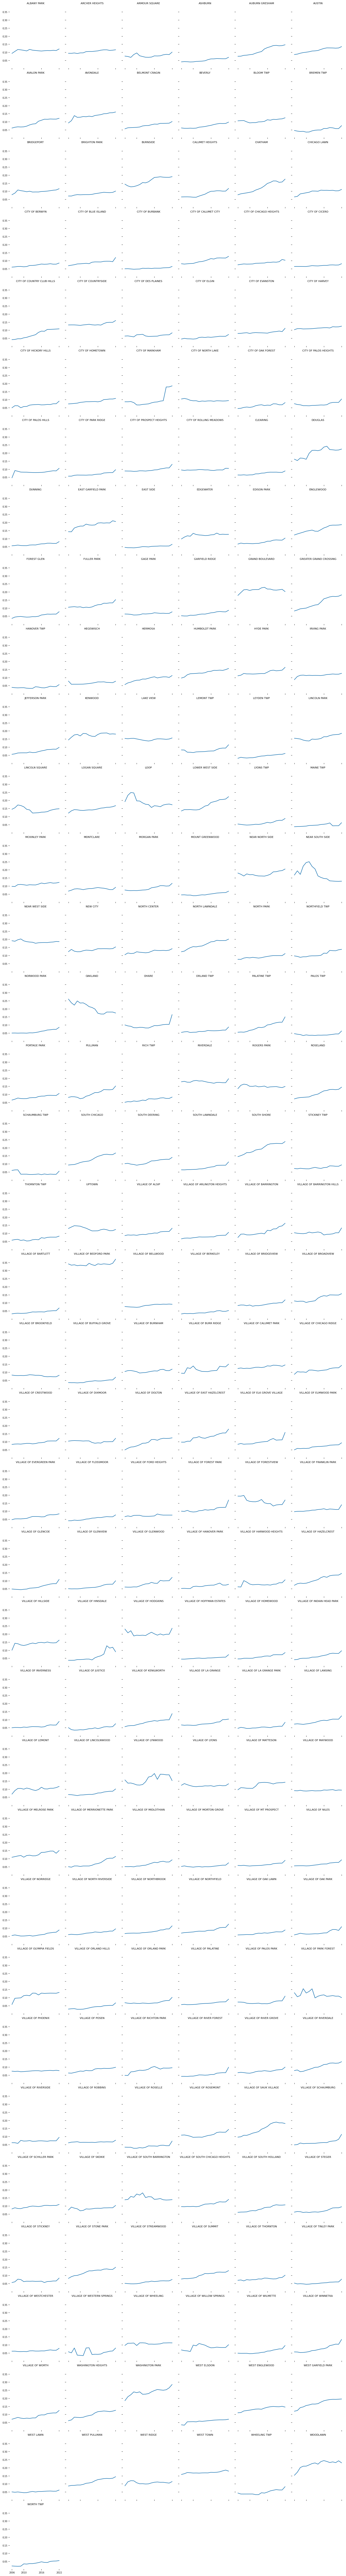

<Figure size 640x480 with 0 Axes>

In [34]:
# plot

# transpose
dft = df_wide.T
dft 

# Set grid dimensions (adjust for the number of subplots)
num_cols = 6  # Number of columns in the grid
num_rows = math.ceil(len(dft.index) / num_cols)  # Auto-calculate rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), sharex=True, sharey=True)

# Flatten axes for easier iteration
axes = axes.flatten()

# Select specific tax years to display on x-axis (e.g., every 5 years)
#selected_years = dft.columns[::5]  # Select every 5th year
selected_years = [2006, 2010, 2016, 2022]

# Plot each municipality in a subplot
for i, (municipality, data) in enumerate(dft.iterrows()): # iterrows returns a tuple of index (muni name) and 
    ax = axes[i]
    ax.plot(data.index, data.values, linestyle='-')  # Line chart, no markers
    ax.set_title(municipality, fontsize=8)

    ax.tick_params(axis='y', labelsize=7)
    
    # Set specific x-axis tick positions and labels
    ax.set_xticks(selected_years)
    ax.set_xticklabels(selected_years, fontsize=7)

    # Remove subplot borders (spines)
    for spine in ax.spines.values():
        spine.set_visible(False)
    

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

plt.savefig('output/mansueto_is_org_grid.png')

In [35]:
fig.savefig('grid.png')